<a href="https://colab.research.google.com/github/proap900/AI_LAB/blob/main/kMeans_clustering_ai_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged at iteration 5


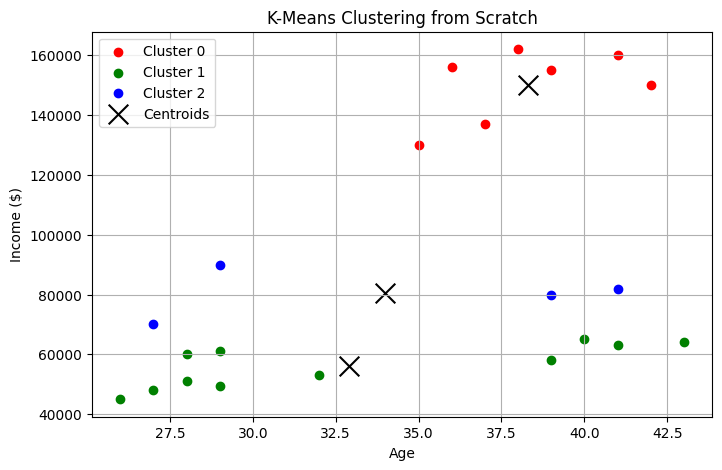

        Name  Age  Income($)  Cluster
0        Rob   27      70000        2
1    Michael   29      90000        2
2      Mohan   29      61000        1
3     Ismail   28      60000        1
4       Kory   42     150000        0
5     Gautam   39     155000        0
6      David   41     160000        0
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        1
17  Priyanka   41      63000        1
18      Nick   43      64000        1
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        1


In [4]:
#k_means_clustering implementation from scratch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Load data
df = pd.read_csv("income.csv")
data = df[['Age', 'Income($)']].values

# Step 2: Set number of clusters
k = 3
max_iters = 100

# Step 3: Initialize centroids randomly
random.seed(42)
initial_centroids = data[random.sample(range(len(data)), k)]


# Step 4: Define distance function (Euclidean)
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# Step 5: Run K-means loop
centroids = initial_centroids
for iteration in range(max_iters):
    # Assignment step
    clusters = [[] for _ in range(k)]
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Save previous centroids for convergence check
    old_centroids = centroids.copy()

    # Update step: calculate new centroids
    centroids = [np.mean(cluster, axis=0) if cluster else old_centroids[i] for i, cluster in enumerate(clusters)]

    # Convergence check
    converged = np.all([np.allclose(old_centroids[i], centroids[i]) for i in range(k)])
    if converged:
        print(f"Converged at iteration {iteration + 1}")
        break

# Step 6: Assign final cluster labels
labels = []
for point in data:
    distances = [euclidean(point, centroid) for centroid in centroids]
    labels.append(np.argmin(distances))

# Step 7: Plot the results
df['Cluster'] = labels
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Age'], cluster_points['Income($)'], color=colors[i], label=f'Cluster {i}')
plt.scatter(*zip(*centroids), color='black', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('K-Means Clustering from Scratch')
plt.legend()
plt.grid(True)
plt.show()

# Optional: View final DataFrame
print(df[['Name', 'Age', 'Income($)', 'Cluster']])

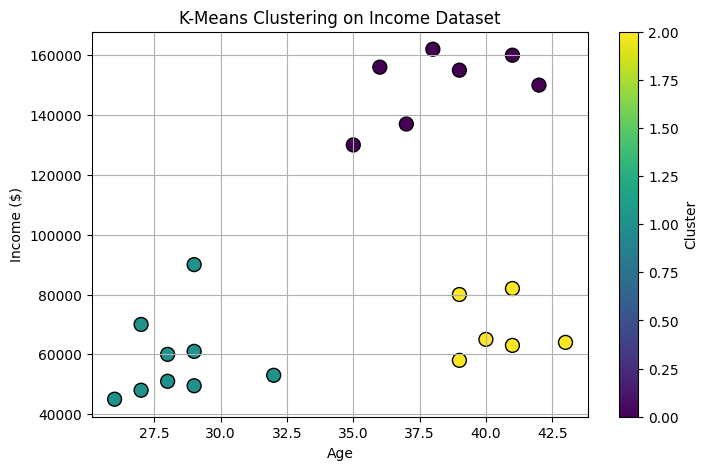

        Name  Age  Income($)  Cluster
0        Rob   27      70000        1
1    Michael   29      90000        1
2      Mohan   29      61000        1
3     Ismail   28      60000        1
4       Kory   42     150000        0
5     Gautam   39     155000        0
6      David   41     160000        0
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        2
17  Priyanka   41      63000        2
18      Nick   43      64000        2
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        2


In [5]:
# kMeans clustering implementation using predefined methods
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("income.csv")

# Step 2: Select relevant features
X = df[['Age', 'Income($)']]  # Using only numeric columns

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Income($)'], c=df['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('K-Means Clustering on Income Dataset')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Display clustered data
print(df[['Name', 'Age', 'Income($)', 'Cluster']])